In [39]:
import pandas as pd
import numpy as np
from dataloading import DataLoader
from datapreparation_py import DataPreparation
from cv_py import CrossValidation
from visualize_py import Visualize
from eda_py import EDA
from implicit.evaluation import ranking_metrics_at_k, train_test_split
from implicit.nearest_neighbours import CosineRecommender
import matplotlib.pyplot as plt

%cd C:\Users\781110104\OneDrive - Genpact\Documents\VSCode

C:\Users\781110104\OneDrive - Genpact\Documents\VSCode


Notebook for final model comparison:

Dataloading and preparation:

In [2]:
dl = DataLoader()
user_item_co = dl.import_data('AGCO', 'CO', 'df')
user_item_co_t = dl.import_data('TEREX', 'CO', 'df')

In [3]:
user_item_filtered = dl.remove_low_interact_items(user_item_co, 1)
user_item_filtered_t = dl.remove_low_interact_items(user_item_co_t, 1)

user_item_filtered_log = dl.log_scale_df(user_item_filtered, 0.01)
user_item_filtered_log_t = dl.log_scale_df(user_item_filtered_t, 0.01)

user_item_csr = dl.to_csr(user_item_filtered_log)
user_item_csr_t = dl.to_csr(user_item_filtered_log_t)

In [4]:
# initial split
train, test = train_test_split(user_item_csr, 0.8, 22)
train_t, test_t = train_test_split(user_item_csr_t, 0.8, 22)

In [5]:
cv = CrossValidation(5)

1. iALS model for OEM#1 data. 
Parameters:
alpha: 0.3, lambda: 90, iterations: 25, factors: 150

In [8]:
space_iALS = {'factors' : [150], 'regularization' : [90], 'alpha' : [0.3], 'iterations' : [25]}
#hyper_ials = cv.hyperp_tuning_simple(test=test, train=train, seed=22, param_space=space_iALS, model_class='iALS')
hyper_ials = cv.evaluate_at_k(space_iALS, 'iALS', train, test, 15)

2. iALS model for OEM#2 data. 
Parameters:
alpha: 1.3, lambda: 90, iterations: 25, factors: 100

In [9]:
space_iALS_t = {'factors' : [100], 'regularization' : [90], 'alpha' : [1.3], 'iterations' : [25]}
#hyper_ials_t = cv.hyperp_tuning_simple(test=test_t, train=train_t, seed=22, param_space=space_iALS_t, model_class='iALS')
hyper_ials_t = cv.evaluate_at_k(space_iALS_t, 'iALS', train_t, test_t, 15)

3. eALS model for OEM#2 data. Parameters: alpha: 0.1, lambda: 50, w0: 5000, iterations: 25, factors: 50

In [10]:
space_eALS_t = {'factors' : [50], 'regularization' : [50], 'alpha' : [0.1], 'w0' : [5000], 'iterations' : [25]}
#hyper_eals_t = cv.hyperp_tuning_simple(test=test_t, train=train_t, seed=22, param_space=space_eALS_t, model_class='eALS')
hyper_eals_t = cv.evaluate_at_k(space_eALS_t, 'eALS', train_t, test_t, 15)

converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>
converting type of user_items to <class 'numpy.float32'>


4. BPR model for OEM#1 data. Parameters: gamma: 0.005, lambda: 0.03, iterations: 30, factors: 50

In [11]:
space_BPR = {'factors' : [50], 'regularization' : [0.03], 'learning_rate' : [0.005], 'iterations' : [30]}
#hyper_bpr = cv.hyperp_tuning_simple(test=test, train=train, seed=22, param_space=space_BPR, model_class='BPR')
hyper_bpr = cv.evaluate_at_k(space_BPR, 'BPR', train, test, 15)

5. LMF model for OEM#1 data. Parameters: gamma: 1.2, lambda: 40, negprop: 50, iterations: 25, factors:10

In [12]:
space_LMF = {'factors' : [10], 'regularization' : [40], 'learning_rate' : [1.2], 'iterations' : [25], 'neg_prop': [50]}
#hyper_lmf = cv.hyperp_tuning_simple(test=test, train=train, seed=22, param_space=space_LMF, model_class='LMF')
hyper_lmf = cv.evaluate_at_k(space_LMF, 'LMF', train, test, 15)

6. Baseline models: cosine-similarity neighborhood-based model for both datasets


In [ ]:
model = CosineRecommender()

In [19]:
model_t = CosineRecommender()

In [18]:
# fit cosine model on OEM#1 data
model.fit(train)

c:\Users\781110104\Anaconda3\lib\site-packages\implicit\utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.020911693572998047 seconds
  warnings.warn(


  0%|          | 0/202000 [00:00<?, ?it/s]

In [20]:
# fit cosine model on OEM#2 data
model_t.fit(train_t)

c:\Users\781110104\Anaconda3\lib\site-packages\implicit\utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0009882450103759766 seconds
  warnings.warn(


  0%|          | 0/16690 [00:00<?, ?it/s]

In [32]:
for k in range(15):
    metrics = ranking_metrics_at_k(model, train, test, k+1, show_progress=False)
    metrics_df = pd.DataFrame(metrics, index=[k+1])
    if k == 0:
        ret_df = metrics_df
    else:
        ret_df = pd.concat([ret_df, metrics_df])

In [33]:
ret_df

,precision,map,ndcg,auc
1,0.828383,0.828383,0.828383,0.500425
2,0.826733,0.802805,0.826359,0.500825
3,0.817382,0.773011,0.814481,0.501226
4,0.801980,0.738586,0.792713,0.501562
5,0.796700,0.726282,0.789651,0.501926
6,0.792629,0.718298,0.787986,0.502306
7,0.776992,0.683330,0.761727,0.502608
8,0.771865,0.669653,0.760032,0.502965
9,0.768243,0.666076,0.759771,0.503304
10,0.761386,0.649333,0.749115,0.503626


In [34]:
for k in range(15):
    metrics_t = ranking_metrics_at_k(model_t, train_t, test_t, k+1, show_progress=False)
    metrics_df_t = pd.DataFrame(metrics_t, index=[k+1])
    if k == 0:
        ret_df_t = metrics_df_t
    else:
        ret_df_t = pd.concat([ret_df_t, metrics_df_t])

In [35]:
ret_df_t

,precision,map,ndcg,auc
1,0.550000,0.550000,0.550000,0.501666
2,0.525000,0.468750,0.519343,0.503311
3,0.508333,0.423611,0.501536,0.504303
4,0.462500,0.330729,0.431377,0.505039
5,0.440000,0.305167,0.421102,0.505932
6,0.429167,0.285833,0.413206,0.507374
7,0.425000,0.288852,0.416448,0.508368
8,0.400000,0.240290,0.372091,0.508869
9,0.394444,0.235708,0.375156,0.509605
10,0.390000,0.226639,0.377067,0.510466


Prepare data for visualization:

In [36]:
precision_a = pd.DataFrame({'iALS' : hyper_ials.precision, 'BPR' : hyper_bpr.precision, 'LMF' : hyper_lmf.precision, 'Cosine': ret_df.precision}, index=hyper_ials.index)
map_a = pd.DataFrame({'iALS' : hyper_ials.map, 'BPR' : hyper_bpr.map, 'LMF' : hyper_lmf.map, 'Cosine': ret_df.map}, index=hyper_ials.index)
ndcg_a = pd.DataFrame({'iALS' : hyper_ials.ndcg, 'BPR' : hyper_bpr.ndcg, 'LMF' : hyper_lmf.ndcg, 'Cosine': ret_df.ndcg}, index=hyper_ials.index)

In [38]:
precision_t = pd.DataFrame({'iALS' : hyper_ials_t.precision, 'eALS' : hyper_eals_t.precision, 'Cosine' : ret_df_t.precision}, index=hyper_ials_t.index)
map_t = pd.DataFrame({'iALS' : hyper_ials_t.map, 'eALS' : hyper_eals_t.map, 'Cosine' : ret_df_t.map}, index=hyper_ials_t.index)
ndcg_t = pd.DataFrame({'iALS' : hyper_ials_t.ndcg, 'eALS' : hyper_eals_t.ndcg, 'Cosine' : ret_df_t.ndcg}, index=hyper_ials_t.index)

Visualizations of results:

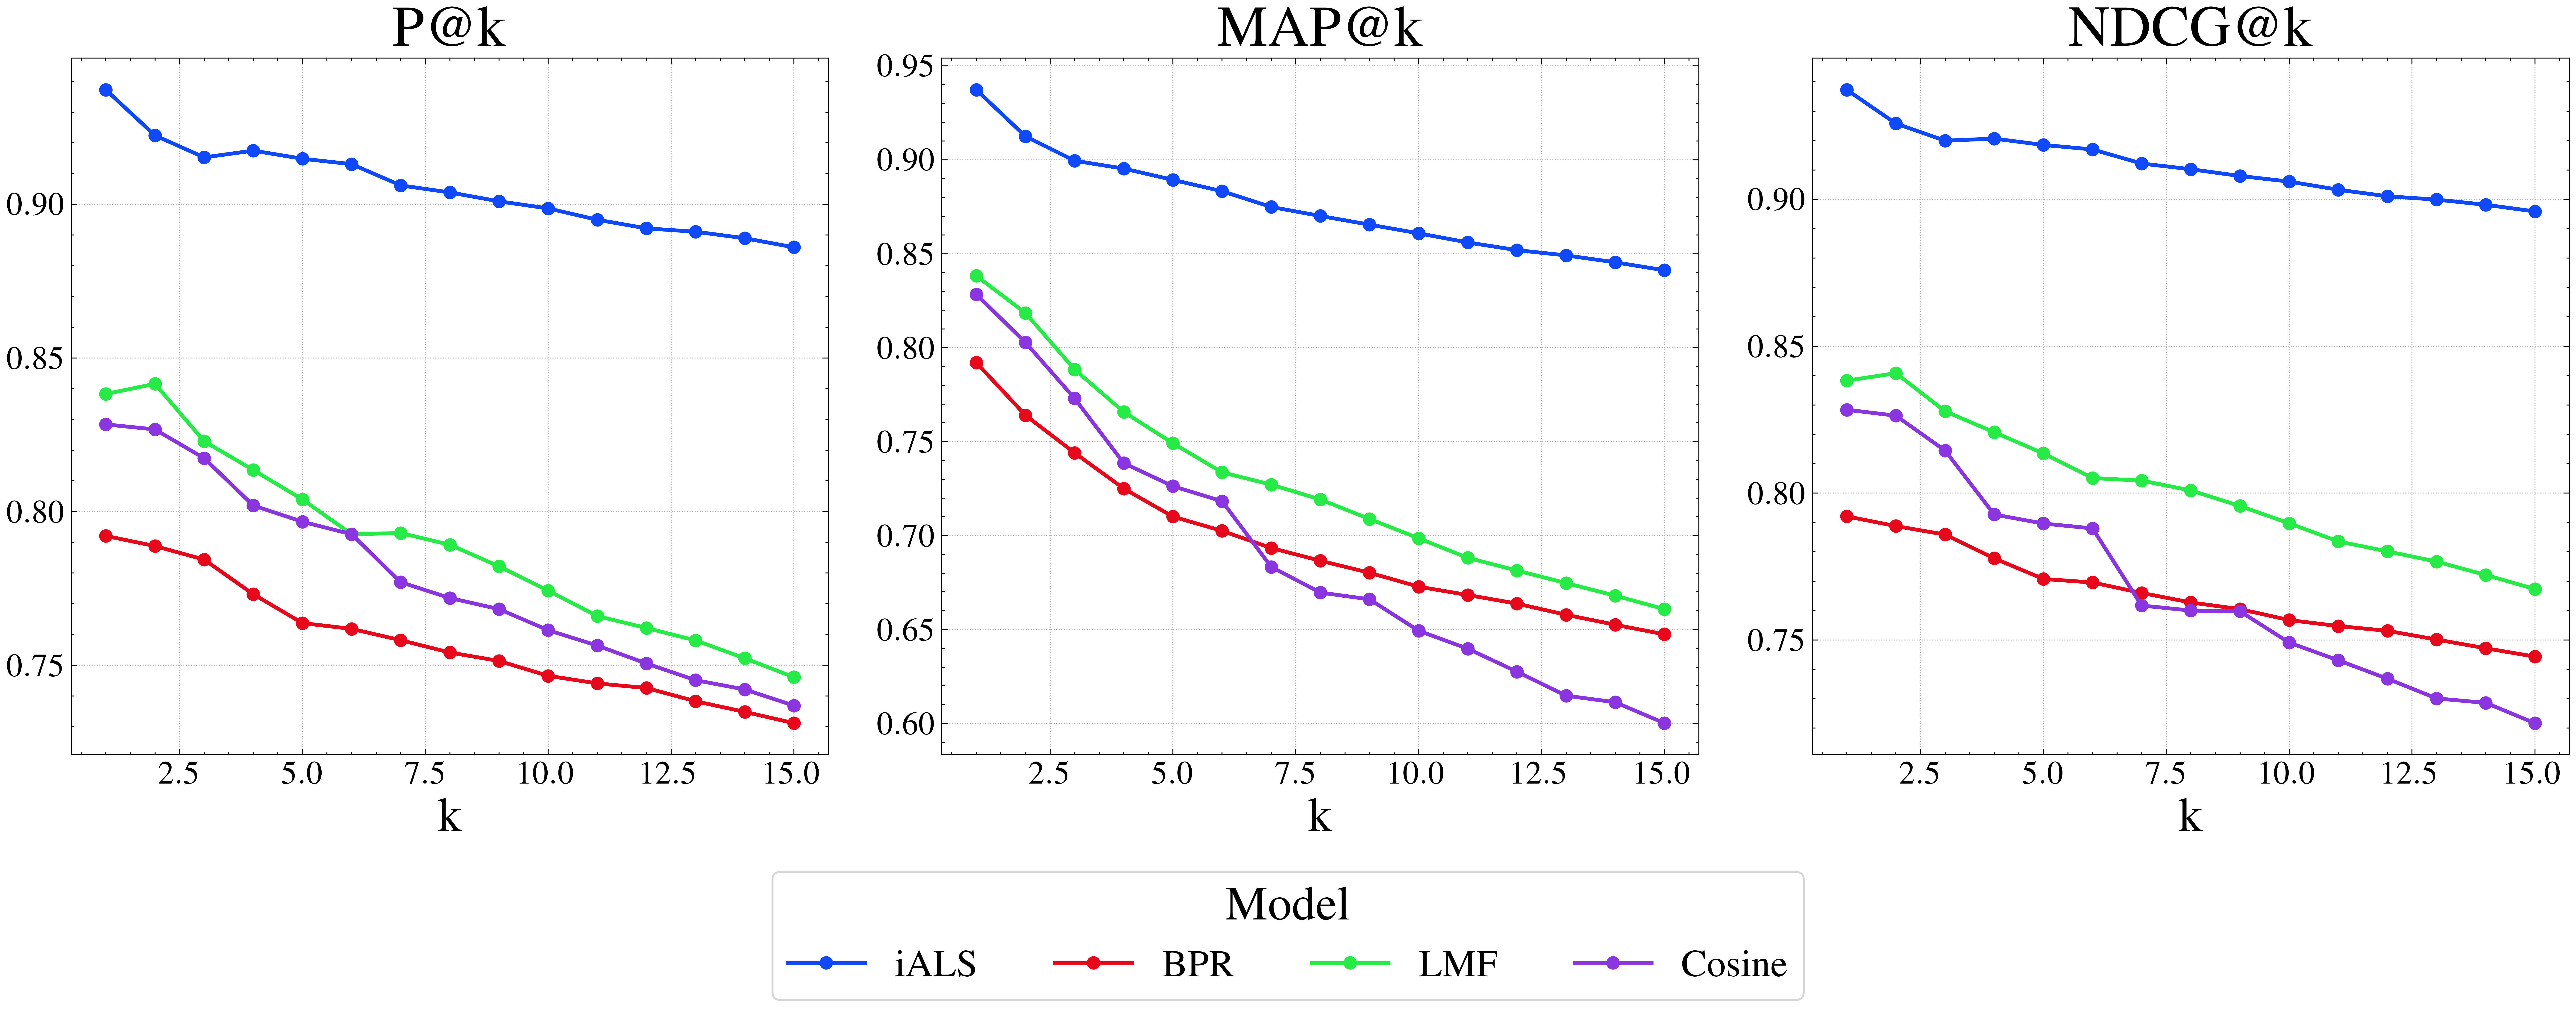

In [58]:
plt.style.use(['science', 'ieee', 'high-vis'])
data_df = [precision_a, map_a, ndcg_a]
names = ['P@k', 'MAP@k', 'NDCG@k']

# plotting of the four curves
fig, ax = plt.subplots(figsize=(26, 8), nrows=1, ncols=3)
plt.subplots_adjust(wspace=0.15, hspace=0.3, right=0.82, bottom=0.25)
c = 0
for i in range(3):
    data_filtered = data_df[c]
    ax[i].plot(data_filtered, linestyle='-', marker='o', linewidth=2)
    ax[i].set_title(names[c], fontsize=30)
    ax[i].set_xlabel('k', fontsize=25)
    ax[i].tick_params(axis='both', which='major', labelsize=17)
    ax[i].tick_params(axis='both', which='minor', labelsize=17)
    ax[i].autoscale()
    ax[i].grid(linestyle=':')
    c += 1
fig.legend(data_filtered.columns, loc='lower center', ncol=4, title='Model',fancybox=True, shadow=False, frameon=True, title_fontsize=25, fontsize=20)
plt.savefig('comparison_a.pdf')
plt.show()

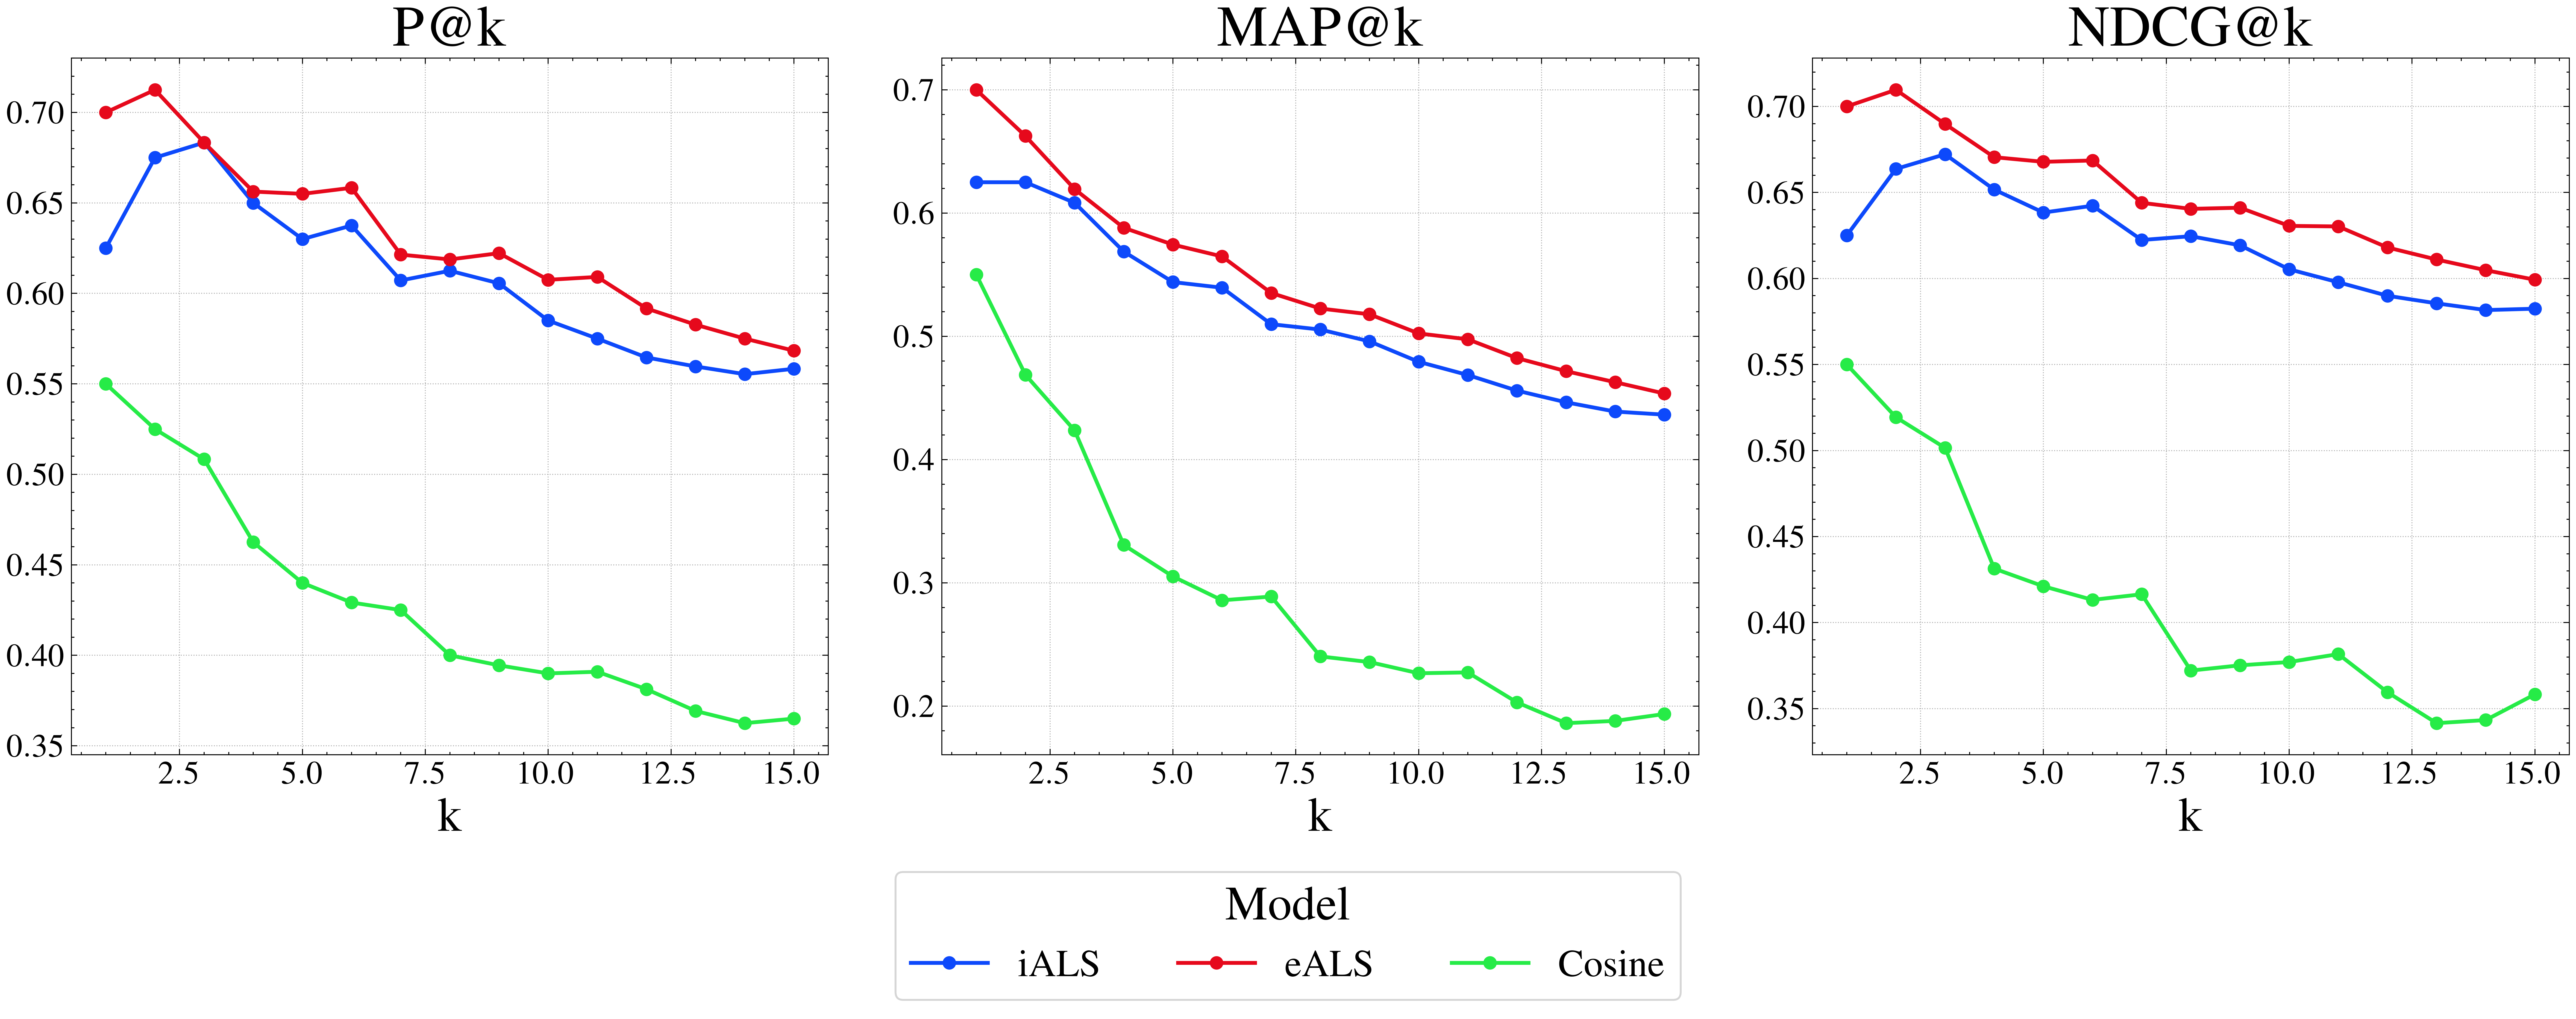

In [59]:
plt.style.use(['science', 'ieee', 'high-vis'])
data_df = [precision_t, map_t, ndcg_t]
names = ['P@k', 'MAP@k', 'NDCG@k']

# plotting of the four curves
fig, ax = plt.subplots(figsize=(26, 8), nrows=1, ncols=3)
plt.subplots_adjust(wspace=0.15, hspace=0.3, right=0.82, bottom=0.25)
c = 0
for i in range(3):
    data_filtered = data_df[c]
    ax[i].plot(data_filtered, linestyle='-', marker='o', linewidth=2)
    ax[i].set_title(names[c], fontsize=30)
    ax[i].set_xlabel('k', fontsize=25)
    ax[i].tick_params(axis='both', which='major', labelsize=17)
    ax[i].tick_params(axis='both', which='minor', labelsize=17)
    ax[i].autoscale()
    ax[i].grid(linestyle=':')
    c += 1
fig.legend(data_filtered.columns, loc='lower center', ncol=4, title='Model',fancybox=True, shadow=False, frameon=True, title_fontsize=25, fontsize=20)
plt.savefig('comparison_t.pdf')
plt.show()